# Figure 3 - tissue validation

In [6]:
libraries <- c("data.table", "tidyr", "ggplot2","purrr", "grid","ggrepel", "ggExtra",
               "ggplotify","magrittr", "ggthemes", "dplyr", "igraph", "RColorBrewer", "gridExtra", "grid")
suppressWarnings(lapply(libraries, require, character.only = TRUE))
options(repr.plot.width=10, repr.plot.height=5)
options(jupyter.plot_mimetypes = "image/svg+xml") 

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

In [7]:
node_name <- fread( file="../../..//data/lookup/node_name_mapping.txt")
colors <- fread( file="../../..//data/lookup/color_code.txt")
node_anno <-  fread( file="../../../data/lookup/node_anno.txt")
pca_data_sub <- fread("../../../data/PCA/pca.txt")
pca_sub_dt2 <- merge(pca_data_sub, node_anno, by.x="V1", by.y="name", all.x=T)

all <- fread("../../../data/analysis/most_sim.tsv")
results <- fread(paste0("../../../data/analysis/robust_genes.tsv"))
vectors <- fread(paste0("../../../data/vectors/txt/deepwalk_node_vectors_8.txt"), skip=1)

col <- as.character(colors$node_colors)
names(col) <- as.character(colors$node_types)

In [8]:
pca_data_sub

V1,Dim.1,Dim.2,Dim.3
A2M,-0.90855216,-1.08147510,0.10292045
AAGAB,-1.04723733,0.13004717,0.21795016
AAK1,-0.67055940,0.02337016,-0.27935773
AAMDC,-1.14973153,0.43449253,0.30414645
AAMP,-0.81103277,0.14406499,0.11460637
AAR2,-0.10251675,-0.31463243,2.09812124
AARS,-1.33647844,-0.01144717,-0.61982734
AARSD1,-0.52948924,-0.28807607,0.30031987
AASDHPPT,-0.76512538,-0.15060476,-0.01258752
AATF,1.11745515,-0.30619988,-0.17216953


In [ ]:
node_name[type=="tissue"]

In [9]:
change_names <- function(dt, lookup, mycol="name"){
  # function to replace names of nodes, using a lookup table
  ## dt: data frame to change
  ## mycol: column in dt to change
  ## lookup table with 'old' and 'new' column, representing old and new names
  dt[, id:=1:nrow(dt)]
  dt <- merge(dt, lookup[,.(old, new)], by.x=mycol, by.y="old", all.x=T)
  dt <- dt[!is.na(new), as.character(mycol):=new][,new:=NULL]
  dt <- dt[order(id)]
  dt[,id:=NULL]
  return(dt)
}

get_legend <- function(p, position = NULL){

  if(.is_list(p)){
    continue <- TRUE
    i <- 1
    while(i <= length(p) & continue){
      leg <- .get_legend(p[[i]], position = position)
      if(!is.null(leg)) continue <- FALSE
      i <- i+1
    }
  }
  else{
    leg <- .get_legend(p, position = position)
  }
  leg
}



# Return legend for one plot
.get_legend <- function(p, position = NULL){

  if(is.null(p)) return(NULL)
  if(!is.null(position)){
    p <- p + theme(legend.position = position)
  }
  tmp <- ggplot_gtable(ggplot_build(p))
  leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
  if(length(leg) > 0) leg <- tmp$grobs[[leg]]
  else leg <- NULL
  leg
}
                      
.is_list <- function(x){
  inherits(x, "list")
}
                      
plot_pca_side <- function(node){
  print(node)
    i=8
  newnode <- node_name[old==node, new]
  
  
  #pca_sub_dt2 <- merge(pca_data_sub, node_anno, by.x="V1", by.y="name", all.x=T)
  pca_sub_dt3 <- merge(pca_sub_dt2, all[run==i][node1==node][order(-sim)][,.(node2, sim)][1:150], by.x="V1", by.y="node2",all.x=T)
  pca_sub_dt3[V1==node, type:=node]
  pca_sub_dt3[V1==node, sim:=1]
  pca_sub_dt3[!is.na(sim), mysize:=0.5]
  pca_sub_dt3[is.na(sim), mysize:=0.6]
  
  mysim_cutoff <- pca_sub_dt3[order(-sim)][16,sim]
  
  # change name of nodes
  pca_sub_dt3 <- change_names(pca_sub_dt3, node_name, mycol="V1")

  
  mycolors <- as.character(c(colors$node_colors,"#FFAC1C" ))
  names(mycolors) <- as.character(c(colors$node_types, newnode))
  
  pca_sub_dt3[V1==newnode, type:=newnode]
 # library(ggpubr)
  library(ggrepel )
  options(ggrepel.max.overlaps = Inf)
  
  x_val=pca_sub_dt3$Dim.1
  y_val=pca_sub_dt3$Dim.2
  
  x_min=ceiling(min(x_val))#-abs(max(x_val) - min(x_val))/2
  x_max=ceiling(max(x_val))
  
  y_min=ceiling(min(y_val))
  y_max=ceiling(max(y_val))#+abs(max(y_val) - min(y_val))/2
  
  plt1 <- ggplot(pca_sub_dt3[order(sim,na.last = F)], aes(x=Dim.1, y=Dim.2, color=sim, label = V1)) + 
    geom_point(aes(size=mysize)) +theme_tufte() +
    scale_size_continuous(range = c(0.5, 1.2))+
    scale_x_continuous(breaks=seq(x_min,x_max,2)) +
    scale_y_continuous(breaks=seq(y_min,y_max,2)) +
    guides(size = "none") +
    labs(x="PC1", y="PC2") +  
    scale_colour_gradient(low = "#d9a6b5",high = "#603642", na.value = "#f2e1e6") +
    theme(axis.line = element_line(size = 0.5))
  plt1_1<-ggplot() + theme_void()

  
  x_val=pca_sub_dt3[!is.na(sim)]$Dim.1
  y_val=pca_sub_dt3[!is.na(sim)]$Dim.2
  
  x_min=min(x_val)
  x_max= max(x_val)
  
  y_min=min(y_val)
  y_max=max(y_val)
  
  plt2<- ggplot(pca_sub_dt3[!is.na(sim),], aes(x=Dim.1, y=Dim.2, color=type)) + 
    geom_point(size=1) +theme_tufte() +
    scale_color_manual(values = mycolors)+ labs(x="PC1", y="PC2") +  
    scale_x_continuous(limits=c(x_min,x_max)) +
    scale_y_continuous(limits=c(y_min,y_max)) +
    geom_label_repel(aes(label=ifelse(sim>mysim_cutoff,as.character(V1),'')),
                     point.padding = 0.5, 
                     box.padding = 1,
                     size = 2)+
    theme(axis.line = element_line(size = 0.5))+  
    theme(panel.border = element_rect(color = "grey",fill = NA,size = 0.5))
  l1 <- get_legend(plt1)
  l2 <- get_legend(plt2)

  
  #final_plot <- grid.arrange(plt1, plt2,plt1_1,
   #                          layout_matrix = rbind(c(1,1,3,2,2,2,2),
    #                                               c(3,3,3,2,2,2,2)))
  return(plt2)
}

[1] "SMTSD_Brain_Cortex"


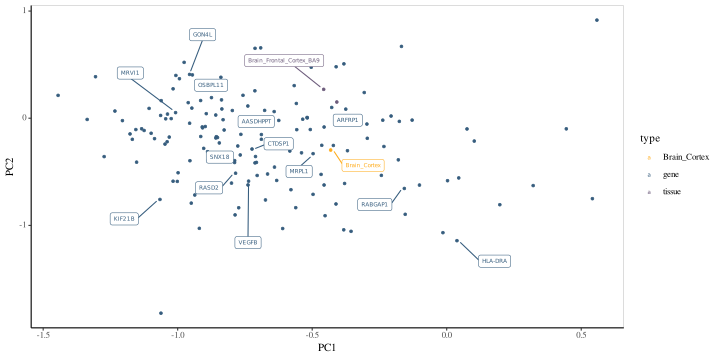

In [10]:
plot_pca_side('SMTSD_Brain_Cortex')

In [8]:
plot_sim_ranking_all <- function(node){
  # get data
  dt = results[node1==node]#[type_node2=="genes"]
  dt <- dt[order(-max_sim)]
  # only top 50
  dt <- dt[1:50]
  # change node name
  dt <- change_names(dt, node_name, mycol="node2")
  node <- node_name[old==node, new]
  dt[,type_col:=paste0(type_node2, "_", neighbour)]
  dt[type_node2=="gene", type_node2:=type_col]

  # # order the node type so that genes, prs, como,.. will always have the same color
  # n_type <- unique(dt$type_node2)
  # mycols <- colors[match(n_type, colors$node_types),]

  mycolors <- as.character(c(colors$node_colors))
  names(mycolors) <- as.character(c(colors$node_types))

   dt= dt[order(-max_sim)]
  idorder <- rev(dt$node2)
  dt$node2 <- factor(dt$node2, levels=idorder)
  x_m <- max(dt$max_sim)

  # idorder <- rev(dt$type_node2)
  # dt$type_node2 <- factor(dt$type_node2, levels=mycols$node_types)
  plt1 <-
    ggplot(dt[1:6], aes(x = node2, y = max_sim, fill = type_node2)) +
    geom_bar(stat = "identity", width = 0.9) +
    scale_fill_manual(values = mycolors) +
    theme_tufte() +
    labs(x = "nodes", y = "max sim score", title=node) +
    #theme(legend.position = "bottom") +
    guides(fill=guide_legend(title="node type"))+
    coord_flip(ylim = c(0.6, x_m))
  return(plt1)
  
}


In [72]:
plt_cor <- plot_sim_ranking_all('SMTSD_Brain_Cortex') + theme(legend.position = "none")

In [73]:
plt_fro <- plot_sim_ranking_all("SMTSD_Brain_Frontal_Cortex_BA9")
l2 <- get_legend(plt_fro)
plt_fro<-plt_fro+ theme(legend.position = "none")

In [74]:
resultsdir="results/fig2_tissue_val/"


In [115]:
svg(file=paste0(resultsdir, Sys.Date(), "_2D.svg"), height=5, width=5)
plot_pca_side('SMTSD_Brain_Cortex')
dev.off()


[1] "SMTSD_Brain_Cortex"


png 
  2

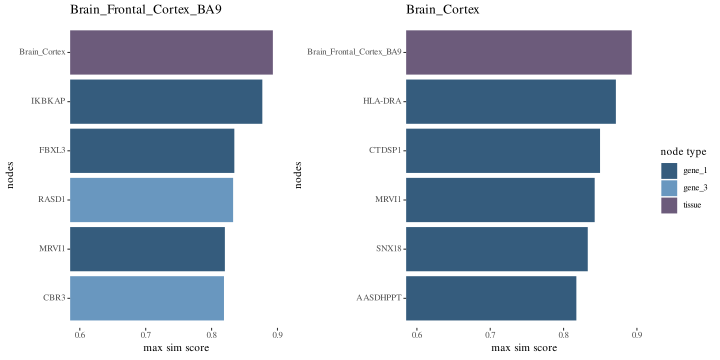

In [80]:
grid.arrange(plt_fro, plt_cor,l2, layout_matrix = rbind(
                                          c(1,1,1,1,2,2,2,2,2,3)))

In [106]:
svg(file=paste0(resultsdir, Sys.Date(), "_1E.svg"), height=2, width=4.6)
grid.arrange(plt_fro, plt_cor, layout_matrix = rbind(
                                          c(1,1,1,1,1,2,2,2,2,2,2,2)))
dev.off()



svg(file=paste0(resultsdir, Sys.Date(), "_1Eleg.svg"), height=2, width=2)
grid.arrange(l2, layout_matrix = rbind(
                                          c(1)))
dev.off()

png 
  2

png 
  2

## ODDS RATIO

In [14]:
full_tissue_dict <- fread("../../../data/lookup/full_tissue_dict.txt")
expr_atlas <- fread("/../../../data/lookup/expr_atlas_names.txt")
gene_name_dict <- fread("../../../datasets/2019_GTEx_v8/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct",  select = c(1:2))


In [15]:
result_genes <- results[type_node2=="gene"]

           Disease Nondisease Total
Exposed          5          1     6
Nonexposed      45         49    94
Total           50         50   100


Warning message in chisq.test(test_dt[, .(top, bottom)]):
“Chi-squared approximation may be incorrect”

           Disease Nondisease Total
Exposed         11          1    12
Nonexposed      89         99   188
Total          100        100   200
           Disease Nondisease Total
Exposed         20          5    25
Nonexposed     180        195   375
Total          200        200   400
           Disease Nondisease Total
Exposed         34          7    41
Nonexposed     266        293   559
Total          300        300   600
           Disease Nondisease Total
Exposed         41          9    50
Nonexposed     359        391   750
Total          400        400   800


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         53         11    64
Nonexposed     447        489   936
Total          500        500  1000


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed          7          1     8
Nonexposed      43         49    92
Total           50         50   100


Warning message in chisq.test(test_dt[, .(top, bottom)]):
“Chi-squared approximation may be incorrect”

           Disease Nondisease Total
Exposed         11          2    13
Nonexposed      89         98   187
Total          100        100   200
           Disease Nondisease Total
Exposed         16          5    21
Nonexposed     184        195   379
Total          200        200   400
           Disease Nondisease Total
Exposed         16          5    21
Nonexposed     284        295   579
Total          300        300   600
           Disease Nondisease Total
Exposed         19          7    26
Nonexposed     381        393   774
Total          400        400   800


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

           Disease Nondisease Total
Exposed         20          8    28
Nonexposed     480        492   972
Total          500        500  1000


Warning message in N1 * N0 * M1 * M0:
“NAs produced by integer overflow”

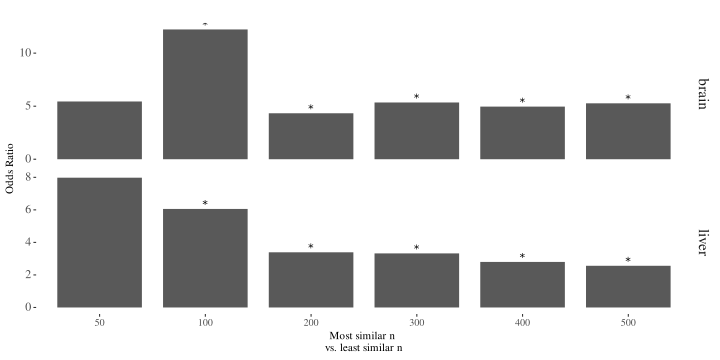

In [18]:
smts <- unique(full_tissue_dict$SMTS)
i=100
x=smts[5]

vec <- c()
vec2 <- c()
nnum_all <- c(50, 100, 200, 300, 400, 500)
for (i in nnum_all){

  dt=get_chitable(smts[5], nnum=i, file="../../../data/tissue_expression/brain.tsv");dt
  a <-  matrix(c(dt[top_bottom=="top" & pass=="yes", N], 
                 dt[top_bottom=="top" & pass=="no", N], 
                 dt[top_bottom=="bottom" & pass=="yes", N], 
                 dt[top_bottom=="bottom" & pass=="no", N]), nrow = 2, ncol = 2, byrow = FALSE)
  esti <- oddsratio(a)$estimate
  vec <- c(vec, esti)
  
  # pval
  test_dt <- dcast(dt[,.(pass,N, top_bottom)], formula=pass~top_bottom, value.var="N") %>% setDT
  test_dt[is.na(bottom), bottom:=0]
  test_dt[is.na(top), top:=0]
  
  ctest <- chisq.test(test_dt[,.(top, bottom)])
  chisq_pval <- ctest$p.value
  vec2 <- c(vec2, chisq_pval)
}


plt_dt <- data.table(odds_ratio=vec,pval= vec2, topn=nnum_all)

plt_dt$topn <- factor(plt_dt$topn, levels=nnum_all)

########################################
# LIVER
vec <- c()
vec2 <- c()
nnum_all <- c(50, 100, 200, 300, 400, 500)
for (i in nnum_all){
  
  dt=get_chitable(smts[11], nnum=i, file="../../../data/tissue_expression/liver.tsv");dt
  # odds ratio
  a <-  matrix(c(dt[top_bottom=="top" & pass=="yes", N], 
                 dt[top_bottom=="top" & pass=="no", N], 
                 dt[top_bottom=="bottom" & pass=="yes", N], 
                 dt[top_bottom=="bottom" & pass=="no", N]), nrow = 2, ncol = 2, byrow = FALSE)
  esti <- oddsratio(a)$estimate
  vec <- c(vec, esti)
  
  # pval
  test_dt <- dcast(dt[,.(pass,N, top_bottom)], formula=pass~top_bottom, value.var="N") %>% setDT
  test_dt[is.na(bottom), bottom:=0]
  test_dt[is.na(top), top:=0]
  
  ctest <- chisq.test(test_dt[,.(top, bottom)])
  chisq_pval <- ctest$p.value
  vec2 <- c(vec2, chisq_pval)
}


plt_dt2 <- data.table(odds_ratio=vec,pval= vec2, topn=nnum_all)

plt_dt2$topn <- factor(plt_dt$topn, levels=nnum_all)
dt_plt <-  rbind(plt_dt[,tissue:="brain"], plt_dt2[,tissue:="liver"])
dt_plt$topn <- factor(dt_plt$topn, levels=nnum_all)

plt <- ggplot(dt_plt, aes(x=topn, y=odds_ratio, label = ifelse(pval < 0.05, "*", ""))) +
  geom_bar(stat = "identity", width=0.8) +theme_tufte() +
  geom_text(vjust = 0) +
  facet_grid(tissue~., scales="free")+
  scale_fill_manual(values=c("#F8B195","#C06C84"))+
  scale_y_continuous(breaks = function(x) unique(floor(pretty(seq(0, (max(x) + 1) * 1.1)))))+
  theme(legend.position = "none")+ 
  theme(strip.text.y = element_text(size = 15),
        axis.text.x = element_text(size = 10),
        axis.text.y = element_text(size = 12))+
  labs(x="Most similar n \nvs. least similar n", y="Odds Ratio", title="");plt


In [20]:
plt_dt

odds_ratio,pval,topn,tissue
5.444444,2.065073e-01,50,brain
12.235955,7.368575e-03,100,brain
4.333333,3.830081e-03,200,brain
5.350161,2.590202e-05,300,brain
4.961622,5.958973e-06,400,brain
5.270897,1.175167e-07,500,brain


In [99]:

svg(file=paste0(resultsdir,Sys.Date(),"_brain_liver_odds.svg"), height=5, width=3.5)
plt
dev.off()


png 
  2

In [17]:
get_smtsd <- function(x){
  return(full_tissue_dict[SMTS%in%x, SMTSD])
}

get_top_n_bottom <- function(dt, nnum=100){
  dt <- dt[order(-mean_sim)]
  dt_res <-rbind(head(dt, n = nnum),tail(dt, n=nnum))
  dt_res2 <- cbind(tissue = full_tissue_dict[SMTSD%in%dt$node1[1], SMTS], dt_res[,.(node1,node2,mean_sim)])
  return(dt_res2)
}
write_table<- function(dt){
  x<- unique(dt$tissue)
  print(x)
  fwrite(dt[,.(gene)], file=paste0("../../../data/tissue/genelist/",Sys.Date(),"_", x,".txt"))
}

get_node_geneList <- function(x){
  dt <- result_genes[node1%in%x][order(-mean_sim)]
  return(dt[!duplicated(dt$node2)])
}


# ##########################################
# ###########################################
x="SMTS_Lung"
get_node_sim_expr <- function(x, nnum, file){
  ext_expr <- fread(file, select=c(1:3))
  
  
  # merge to get ENS IDs
  dt <- get_node_geneList(get_smtsd(x))
  dt <- merge(gene_name_dict, dt, by.x="Description", by.y="node2")
  dt <- separate(
    dt,
    col="Name",
    into=c("ENS", "sth"),
    sep = "\\.")
  
  
  
  #merge
  dt_expr <- merge(dt, ext_expr, by.y="Ensembl",by.x="ENS", all.x=T)
  
  dt_expr <- dt_expr[order(-mean_sim)]
  top <- head(dt_expr, n = nnum)[,top_bottom:="top"]
  bottom <- tail(dt_expr, n=nnum) [,top_bottom:="bottom"]
  both <- rbind(top, bottom)
  both[!is.na(Gene), pass:="yes"]
  both[is.na(Gene), pass:="no"]
  return(both)
}
get_chitable <-
  function(x, nnum, file) {    
    # external expression
    # ext_expr <- fread("../../../data/tissue_expression/brain_more.tsv", select=c(1:3))
    ext_expr <- fread(file, select=c(1:3))

    
    # merge to get ENS IDs
    dt <- get_node_geneList(get_smtsd(x))
    dt <- merge(gene_name_dict, dt, by.x="Description", by.y="node2")
    dt <- separate(
      dt,
      col="Name",
      into=c("ENS", "sth"),
      sep = "\\.")

    
    
    #merge
    dt_expr <- merge(dt, ext_expr, by.y="Ensembl",by.x="ENS", all.x=T)
    
    dt_expr <- dt_expr[order(-mean_sim)]
    top <- head(dt_expr, n = nnum)[,top_bottom:="top"]
    bottom <- tail(dt_expr, n=nnum) [,top_bottom:="bottom"]
    both <- rbind(top, bottom)
    both[!is.na(Gene), pass:="yes"]
    both[is.na(Gene), pass:="no"]
    count_table <-both[,.N, by=.(top_bottom, pass)]
    return(count_table)
  }

get_data_expr <-
  function(x, nnum, file) {    
    # external expression
    # ext_expr <- fread("../../../data/tissue_expression/brain_more.tsv", select=c(1:3))
    ext_expr <- fread(file, select=c(1:3))
    
    
    # merge to get ENS IDs
    dt <- get_node_geneList(get_smtsd(x))
    dt <- merge(gene_name_dict, dt, by.x="Description", by.y="node2")
    dt <- separate(
      dt,
      col="Name",
      into=c("ENS", "sth"),
      sep = "\\.")
    
    
    
    #merge
    dt_expr <- merge(dt, ext_expr, by.y="Ensembl",by.x="ENS", all.x=T)
    
    dt_expr <- dt_expr[order(-mean_sim)]
    top <- head(dt_expr, n = nnum)[,top_bottom:="top"]
    bottom <- tail(dt_expr, n=nnum) [,top_bottom:="bottom"]
    both <- rbind(top, bottom)
    both[!is.na(Gene), pass:="yes"]
    both[is.na(Gene), pass:="no"]
    return(both)
  }

plot_chitest <- function(x, dt){
  # chisquared test
  test_dt <- dcast(dt[,.(pass,N, top_bottom)], formula=pass~top_bottom, value.var="N") %>% setDT
  test_dt[is.na(bottom), bottom:=0]
  test_dt[is.na(top), top:=0]
  
  ctest <- chisq.test(test_dt[,.(top, bottom)])
  chisq_pval <- ctest$p.value
  # return(chisq_pval)
  dt$top_bottom <-
    factor(dt$top_bottom, levels = c("top", "bottom"))
  
  ggplot(dt, aes(y = N, x = top_bottom, fill = pass)) +
    geom_bar(stat = "identity", width = 0.5, alpha=0.7) +
    labs(title = paste0(x, " \npval: ", round(chisq_pval, digits=5)),y="count") +
    guides(fill=guide_legend(title="enriched\nexpression"))+
    scale_fill_manual(values=c("#F8B195", "#C06C84")) +
    theme_tufte()
}
compare_top_bottom <- function(x, nnum, expr_thres){
  dt <- get_chitable(x,nnum, expr_thres)
  plot_chitest(x, dt)
}


oddsratio <- function(a, b=NULL, c=NULL, d=NULL, conf.level=0.95, p.calc.by.independence=TRUE) {
  if (is.matrix(a)) {
    if ((dim(a)[1] != 2L) | (dim(a)[2] != 2L)) {
      stop("Input matrix must be a 2x2 table.")
    }
    .a <- a[1, 1]
    .b <- a[2, 1]
    .c <- a[1, 2]
    .d <- a[2, 2]
    .data.name <- deparse(substitute(a))
  } else {
    .a <- a
    .b <- b
    .c <- c
    .d <- d
    .data.name <- paste(deparse(substitute(a)), 
                        deparse(substitute(b)), 
                        deparse(substitute(c)), 
                        deparse(substitute(d)))
  }
  .MAT <- matrix(c(.a, .b, M1<-.a+.b, 
                   .c, .d, M0<-.c+.d, 
                   N1<-.a+.c, N0<-.b+.d, Total<-.a+.b+.c+.d), 3, 3)
  colnames(.MAT) <- c("Disease","Nondisease","Total")
  rownames(.MAT) <- c("Exposed","Nonexposed","Total")
  class(.MAT) <- "table"
  print(.MAT)
  ESTIMATE <- (.a*.d)/(.b*.c)
  norm.pp <- qnorm(1-(1-conf.level)/2)
  if (p.calc.by.independence) {
    p.v <- 2*(1-pnorm(abs((.a-N1*M1/Total)/sqrt(N1*N0*M1*M0/Total/Total/(Total-1)))))
  } else {
    p.v <- 2*(1-pnorm(log(ifelse(ESTIMATE>1,ESTIMATE,1/ESTIMATE))/sqrt(1/.a+1/.b+1/.c+1/.d)))
  }
  ORL <- ESTIMATE*exp(-norm.pp*sqrt(1/.a + 1/.b + 1/.c + 1/.d))
  ORU <- ESTIMATE*exp(norm.pp*sqrt(1/.a + 1/.b + 1/.c + 1/.d))
  CINT <- c(ORL,ORU)
  attr(CINT, "conf.level") <- conf.level
  RVAL <- list(p.value=p.v, conf.int=CINT, estimate=ESTIMATE, 
               method="Odds ratio estimate and its significance probability",
               data.name=.data.name)
  class(RVAL) <- "htest"
  return(RVAL)
}


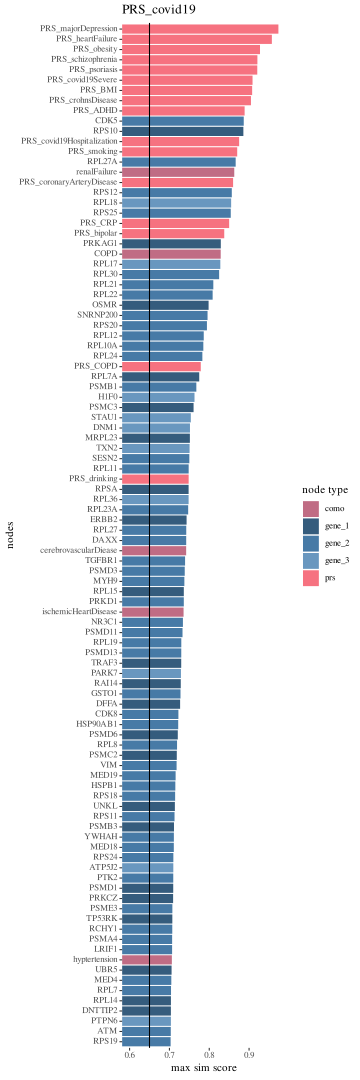

In [23]:
options(repr.plot.width=5, repr.plot.height=15)

plot_sim_ranking_genes("covid19hg")


In [22]:
plot_sim_ranking_genes <- function(node){
  # get data
  dt = results[node1==node]#[type_node2=="gene"]
  dt <- dt[order(-max_sim)]
  # only top 50
  dt <- dt[1:100]
  # change node name
  dt <- change_names(dt, node_name, mycol="node2")
  node <- node_name[old==node, new]
  dt[,type_col:=paste0(type_node2, "_", neighbour)]
  dt[type_node2=="gene", type_node2:=type_col]

  # # order the node type so that genes, prs, como,.. will always have the same color
  # n_type <- unique(dt$type_node2)
  # mycols <- colors[match(n_type, colors$node_types),]

  mycolors <- as.character(c(colors$node_colors))
  names(mycolors) <- as.character(c(colors$node_types))

   dt= dt[order(-max_sim)]
  idorder <- rev(dt$node2)
  dt$node2 <- factor(dt$node2, levels=idorder)
  x_m <- max(dt$max_sim)

  # idorder <- rev(dt$type_node2)
  # dt$type_node2 <- factor(dt$type_node2, levels=mycols$node_types)
  plt1 <-
    ggplot(dt[1:100], aes(x = node2, y = max_sim, fill = type_node2)) +
    geom_bar(stat = "identity", width = 0.9) +
    scale_fill_manual(values = mycolors) +
    theme_tufte() +
    geom_hline(yintercept = 0.65)+
    labs(x = "nodes", y = "max sim score", title=node) +
    #theme(legend.position = "bottom") +
    guides(fill=guide_legend(title="node type"))+
    coord_flip(ylim = c(0.6, x_m))
  return(plt1)
  
}
